In [1]:
import numpy as np
import xarray as xr
from utility import util, load01deg, load
import utility.analysis_parameters as ap
import statistics as stats
import matplotlib.pyplot as plt
from utility import vert_cld_frac

c = ap.COLORS
REGION = "TWP"

In [2]:
# load 0.1 deg data
nolr = load01deg.get_olr("NICAM", REGION)[:,0,:,:]
folr = load01deg.get_olr("FV3", REGION)
iolr = load01deg.get_olr("ICON", REGION)
solr = load01deg.get_olr("SAM", REGION)
molr = load01deg.get_olr("MPAS", REGION)
eolr = load01deg.get_olr("ECMWF", REGION)
aolr = load01deg.get_olr("ARP", REGION)
uolr = load01deg.get_olr("UM", REGION)

# coarsen model data to 1x1deg hourly data
nolr_llavg = np.zeros((nolr.shape[0]//4, 10, 10))
folr_llavg = np.zeros((folr.shape[0]//4, 10, 10))
iolr_llavg = np.zeros((iolr.shape[0]//4, 10, 10))
solr_llavg = np.zeros((solr.shape[0]//2, 10, 10))
molr_llavg = np.zeros((molr.shape[0]//4, 10, 10))
eolr_llavg = np.zeros((eolr.shape[0], 10, 10))
aolr_llavg = np.zeros((aolr.shape[0]//4, 10, 10))
uolr_llavg = np.zeros((uolr.shape[0], 10, 10))
for lat in range(10):
    for lon in range(10):
        nolr_llavg[:,lat, lon] = np.nanmean(nolr[3::4,(lat*10):(lat+1)*10,(lon*10):(lon+1)*10], axis=(1,2)) 
        folr_llavg[:,lat, lon] = np.nanmean(folr[3::4,(lat*10):(lat+1)*10,(lon*10):(lon+1)*10], axis=(1,2))
        iolr_llavg[:,lat, lon] = np.nanmean(iolr[3::4,(lat*10):(lat+1)*10,(lon*10):(lon+1)*10], axis=(1,2))
        solr_llavg[:,lat, lon] = np.nanmean(solr[1::2,(lat*10):(lat+1)*10,(lon*10):(lon+1)*10], axis=(1,2))
        molr_llavg[:,lat, lon] = np.nanmean(molr[3::4,(lat*10):(lat+1)*10,(lon*10):(lon+1)*10], axis=(1,2))
        eolr_llavg[:,lat, lon] = np.nanmean(eolr[:,(lat*10):(lat+1)*10,(lon*10):(lon+1)*10], axis=(1,2))
        aolr_llavg[:,lat, lon] = np.nanmean(aolr[3::4,(lat*10):(lat+1)*10,(lon*10):(lon+1)*10], axis=(1,2))
        uolr_llavg[:,lat, lon] = np.nanmean(uolr[:,(lat*10):(lat+1)*10,(lon*10):(lon+1)*10], axis=(1,2))


# get observational data
colr = xr.open_dataset(ap.CERES_SYN1)["olrtoa_all"]
colr_yr = colr.groupby("time.year").mean()
cccmolr = xr.open_dataset("/home/disk/eos15/smturbev/SAT_DATA/CERES/CCCM_dTWP_2007-2010_AUG.nc")["CERES LW TOA flux - upwards"]

def stdev(data):
    if len(data.shape)>1:
        data = data.flatten()
    data_mean = np.nanmean(data)
    data_i = np.power((data - data_mean),2)
    data_sum = np.nansum(data_i)
    data_stdev = np.sqrt(data_sum/(len(data)-1))
    return data_stdev
    

cmeans = np.zeros(20)
cstdev = np.zeros(20)
for i, item in enumerate(colr.groupby("time.year")):
    cmeans[i] = np.nanmean(item[1])
    cstdev[i] = stdev(item[1].values)

# get average
nmean = np.nanmean(nolr_llavg)
fmean = np.nanmean(folr_llavg)
imean = np.nanmean(iolr_llavg)
smean = np.nanmean(solr_llavg)
mmean = np.nanmean(molr_llavg)
emean = np.nanmean(eolr_llavg)
amean = np.nanmean(aolr_llavg)
umean = np.nanmean(uolr_llavg)
cccmmean = np.nanmean(cccmolr)

print("OLR mean:")
print("nicam", int(nmean))
print("fv3  ", int(fmean))
print("icon ", int(imean))
print("sam  ", int(smean))
print("mpas ", int(mmean))
print("ecmwf", int(emean))
print("arpnh", int(amean))
print("um   ", int(umean))
print("cccm ", int(cccmmean))
for i in range(20):
    print(2000+i, cmeans[i])
# print("syn1:", int(cmeans))


# get std dev
nstdev = stdev(nolr_llavg.flatten())
fstdev = stdev(folr_llavg.flatten())
istdev = stdev(iolr_llavg.flatten())
sstdev = stdev(solr_llavg.flatten())
mstdev = stdev(molr_llavg.flatten())
estdev = stdev(eolr_llavg.flatten())
astdev = stdev(aolr_llavg.flatten())
ustdev = stdev(uolr_llavg.flatten())
cccmstdev = stdev(cccmolr.values.flatten())

# get swu load 0.1 deg data
nswu = load01deg.get_swu("NICAM", REGION)
fswu = load01deg.get_swu("FV3", REGION)
iswu = load01deg.get_swu("ICON", REGION)
sswu = load01deg.get_swu("SAM", REGION)
mswu = load01deg.get_swu("MPAS", REGION)
eswu = load01deg.get_swu("ECMWF", REGION)
aswu = load01deg.get_swu("ARP", REGION)
uswu = load01deg.get_swu("UM", REGION)
cswu = xr.open_dataset(ap.CERES_SYN1)["swutoa_all"]
cswu_yr = cswu.groupby("time.year").mean()
cccmswu = xr.open_dataset("/home/disk/eos15/smturbev/SAT_DATA/CERES/CCCM_dTWP_2007-2010_AUG.nc")["CERES SW TOA flux - upwards"]

# coarsen model data to 1x1deg hourly data
nswu_llavg = np.zeros((nswu.shape[0]//4, 10, 10))
fswu_llavg = np.zeros((fswu.shape[0]//4, 10, 10))
iswu_llavg = np.zeros((iswu.shape[0]//4, 10, 10))
sswu_llavg = np.zeros((sswu.shape[0]//2, 10, 10))
mswu_llavg = np.zeros((mswu.shape[0]//4, 10, 10))
eswu_llavg = np.zeros((eswu.shape[0], 10, 10))
aswu_llavg = np.zeros((aswu.shape[0]//4, 10, 10))
uswu_llavg = np.zeros((uswu.shape[0], 10, 10))
for lat in range(10):
    for lon in range(10):
        nswu_llavg[:,lat, lon] = np.nanmean(nswu[3::4,(lat*10):(lat+1)*10,(lon*10):(lon+1)*10], axis=(1,2)) 
        fswu_llavg[:,lat, lon] = np.nanmean(fswu[3::4,(lat*10):(lat+1)*10,(lon*10):(lon+1)*10], axis=(1,2))
        iswu_llavg[:,lat, lon] = np.nanmean(iswu[3::4,(lat*10):(lat+1)*10,(lon*10):(lon+1)*10], axis=(1,2))
        sswu_llavg[:,lat, lon] = np.nanmean(sswu[1::2,(lat*10):(lat+1)*10,(lon*10):(lon+1)*10], axis=(1,2))
        mswu_llavg[:,lat, lon] = np.nanmean(mswu[3::4,(lat*10):(lat+1)*10,(lon*10):(lon+1)*10], axis=(1,2))
        eswu_llavg[:,lat, lon] = np.nanmean(eswu[:,(lat*10):(lat+1)*10,(lon*10):(lon+1)*10], axis=(1,2))
        aswu_llavg[:,lat, lon] = np.nanmean(aswu[3::4,(lat*10):(lat+1)*10,(lon*10):(lon+1)*10], axis=(1,2))
        uswu_llavg[:,lat, lon] = np.nanmean(uswu[:,(lat*10):(lat+1)*10,(lon*10):(lon+1)*10], axis=(1,2))

# calculate mean swu
#change nan to zerocasrs
cswu = cswu.where(~np.isnan(cswu),0)

sw_nmean = np.nanmean(nswu_llavg)
sw_fmean = np.nanmean(fswu_llavg)
sw_imean = np.nanmean(iswu_llavg)
sw_smean = np.nanmean(sswu_llavg)
sw_mmean = np.nanmean(mswu_llavg)
sw_emean = np.nanmean(eswu_llavg)
sw_amean = np.nanmean(aswu_llavg)
sw_umean = np.nanmean(uswu_llavg)
sw_cccmmean = np.nanmean(cccmswu)

sw_cmeans = np.zeros(20)
for i, item in enumerate(cswu.groupby("time.year")):
    sw_cmeans[i] = np.nanmean(item[1])

print("SWU mean:")
print("nicam", int(sw_nmean))
print("fv3  ", int(sw_fmean))
print("icon ", int(sw_imean))
print("sam  ", int(sw_smean))
print("mpas ", int(sw_mmean))
print("ecmwf", int(sw_emean))
print("arpnh", int(sw_amean))
print("um   ", int(sw_umean))
print("cccm ", int(sw_cccmmean))
for i in range(20):
    print(2000+i, sw_cmeans[i])

Returned olr for NICAM (TWP) with shape: (3744, 1, 100, 100)
Returned olr for FV3 (TWP) with shape: (3648, 100, 100)
Returned olr for ICON (TWP) with shape: (3745, 100, 100)
Returned olr for SAM (TWP) with shape: (1824, 100, 100)
Returned olr for MPAS (TWP) with shape: (3649, 100, 100)
Returned olr for ECMWF (TWP) with shape: (912, 100, 100)
Returned olr for ARP (TWP) with shape: (3648, 100, 100)
Returned olr for UM (TWP) with shape: (768, 100, 100)
OLR mean:
nicam 205
fv3   236
icon  242
sam   226
mpas  230
ecmwf 259
arpnh 254
um    201
cccm  237
2000 220.1392059326172
2001 227.4149169921875
2002 237.231689453125
2003 219.46139526367188
2004 228.93032836914062
2005 219.9876251220703
2006 222.1494140625
2007 240.22528076171875
2008 231.86721801757812
2009 230.92218017578125
2010 243.06658935546875
2011 223.6975860595703
2012 219.6900177001953
2013 226.54644775390625
2014 231.51071166992188
2015 241.67665100097656
2016 237.43699645996094
2017 237.00949096679688
2018 221.38499450683594
2

In [2]:
# # scatter plot of mean vs std
# fig = plt.figure(figsize=(12,6), constrained_layout=True)
# fs=12
# gs = fig.add_gridspec(2,3,width_ratios=[6,6,0.4])

# ax0 = fig.add_subplot(gs[0,1])
# ms = 100
# ax0.scatter(cmeans, cstdev, label="CERES SYN1 Yearly", s=ms*2/3, color='gray', marker="s", alpha=0.6)
# ax0.scatter(np.nanmean(cmeans), np.nanmean(cstdev), label="CERES SYN1 Avg", s=ms*2/3, color='k', marker="s", alpha=1)
# ax0.scatter(cmeans[16], cstdev[16], label="CERES SYN1 2016", s=ms*2/3, color='r', marker="s", alpha=1.)
# ax0.scatter(cccmmean, cccmstdev, label="CCCM Avg", s=ms*2/3, color='b', marker="s", alpha=1)
# ax0.scatter(nmean, nstdev, color=c["NICAM"], label="NICAM", s=ms)
# ax0.scatter(fmean, fstdev, color=c["FV3"], label="FV3", s=ms)
# ax0.scatter(imean, istdev, color=c["ICON"], label="ICON", s=ms)
# ax0.scatter(smean, sstdev, color=c["SAM"], label="SAM", s=ms)
# ax0.scatter(amean, astdev, color=c["ARPNH"], label="ARPNH", s=ms, marker="^")
# ax0.scatter(emean, estdev, color=c["IFS"], label="IFS", s=ms, marker="^")
# ax0.scatter(mmean, mstdev, color=c["MPAS"], label="MPAS", s=ms, marker="^")
# ax0.scatter(umean, ustdev, color=c["UM"], label="UM", s=ms, marker="^")
# ax0.tick_params(labelsize=fs)
# ax0.set_xticklabels([])
# ax0.set_ylabel("Standard Deviation\n(W/m2)",fontsize=fs)
# #ax0.set_xlabel("Mean OLR (W/m2)", fontsize=fs)
# #ax0.set_title("Mean OLR vs Std Dev, "+REGION, fontsize=fs)
# ax0.grid()

# ax1 = fig.add_subplot(gs[1,1])
# ax1.scatter(cmeans, sw_cmeans, label="CERES SYN1 Yearly", s=ms*2/3, color='gray', marker="s", alpha=1)
# ax1.scatter(cmeans[16], sw_cmeans[16], label="CERES SYN1 2016", s=ms*2/3, color='tab:red', marker="s", alpha=1.)
# ax1.scatter(cccmmean, sw_cccmmean, label="CCCM Avg", s=ms*2/3, color='mediumblue', marker="s", alpha=1)
# ax1.scatter(np.nanmean(cmeans), np.nanmean(sw_cmeans), label="CERES SYN1 Avg", s=ms*2/3, color='k', marker="s", alpha=1)
# ax1.scatter(nmean, sw_nmean, color=c["NICAM"], label="NICAM", s=ms)
# ax1.scatter(fmean, sw_fmean, color=c["FV3"], label="FV3", s=ms)
# ax1.scatter(imean, sw_imean, color=c["ICON"], label="ICON", s=ms)
# ax1.scatter(smean, sw_smean, color=c["SAM"], label="SAM", s=ms)
# ax1.scatter(amean, sw_amean, color=c["ARPNH"], label="ARPNH", s=ms, marker="^")
# ax1.scatter(emean, sw_emean, color=c["IFS"], label="IFS", s=ms, marker="^")
# ax1.scatter(mmean, sw_mmean, color=c["MPAS"], label="MPAS", s=ms, marker="^")
# ax1.scatter(umean, sw_umean, color=c["UM"], label="UM", s=ms, marker="^")
# ax1.tick_params(labelsize=fs)
# ax1.set_ylabel("Mean Reflected SW\n(W/m2)",fontsize=fs)
# ax1.set_xlabel("Mean OLR (W/m2)", fontsize=fs)
# #ax1.set_title("Mean OLR vs Mean Reflected SW, "+REGION, fontsize=28)
# ax1.grid()

# axc = fig.add_subplot(gs[:,2])
# h, l = ax0.get_legend_handles_labels()
# axc.legend(h, l, loc="center", fontsize=fs)
# axc.axis("off")

# REGION="TWP"
# axz = fig.add_subplot(gs[:,0])
# vert_cld_frac.plot_vert_cld_frac_model("ICON", REGION, ax=axz, ice_only=True, plot_ttl=True)

# axz.annotate("(a)", xy=(0.71, 19), xycoords="data", fontsize=14)
# ax0.annotate("(b)", xy=(256, 53), xycoords="data", fontsize=14)
# ax1.annotate("(c)", xy=(256, 122), xycoords="data", fontsize=14)

# plt.savefig("../plots/fig05_%s_model_biases.png"%REGION,dpi=150,bbox_inches="tight")
# print("... saved to ../plots/fig05_%s_model_biases.png"%REGION)
# plt.show()

In [3]:
frac, z = vert_cld_frac.get_cld_frac("ICON","TWP",ice_only=True)

	using qi and ql only
Getting frozen hydrometeors for ICON TWP:
... added qi + ql ...
... del qi, ql...
	 returned temperature with shape (312, 77, 195442)
	 returned water vapor mixing ratio with shape (312, 77, 195442)
... Tv ...
	 returned pressure with shape (312, 77, 195442)
... rho ...
... iwc ...
Returning ice water content (kg/m3) for ICON as (312, 77, 195442) xarray


	got ilwc for ICON TWP
(0, 91, 190783) True shape of z, if true removed first day of model output
	 returned height with shape (0, 91, 190783)
ICON z (77,) [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
	returning model cld frac and z for ICON TWP


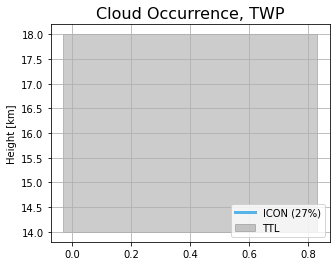

In [9]:
fig = plt.figure(figsize=(5,4))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])
cf_list = dict(zip(["DARDAR", "CCCM", "NICAM", "FV3", "ICON","SAM"],[13, 13, 0.4, 25, 27, 18]))
alpha=1
ax.plot(frac*100, z/1000, color=c["ICON"], lw=3, label="{} ({}%)".format("ICON", cf_list["ICON"]), alpha=alpha)
ax.fill_between([-0.03,0.83],14,18, color='black', alpha=0.2, label="TTL")
# ax.set_ylim([0,20])
# ax.set_xlim([-0.03,0.83]) #83
ax.legend(loc=4)
ax.set_ylabel("Height [km]")
ax.set_title('Cloud Occurrence, %s'%("TWP"), fontsize=16)
ax.grid()
plt.savefig("test_icon.png")
plt.show()